# Social dimensions of Eaton and Palisades fires

**Author:** Jaslyn Miura

**GitHub Repository:** https://github.com/jaslynmiura/eds220-hwk4

## About

**Purpose**: Using Environmental Justice Index data and Eaton and Palisades fire (Janurary 2025) perimeters to map socioeconomic vulnerabilities that may affect response, relief, and recovery from fires.

**Highlights**:

- Spatially join data

- Polygon clipping

- Create a choropleth map

**About the Data**:

- Environmental Justice Index: Access from the Centers for Disease Control and Prevention and Agency for Toxic Substances Disease Registry's Geospatial, Research, Analysis, and Services program. The datafroma contains EJI data for the state of California.
  
    - Data Source: [EJI Data](https://www.atsdr.cdc.gov/place-health/php/eji/eji-data-download.html)

    - Data Accessed: November 21, 2025

- Eaton Fire Perimeter: Retrieved from the County of Los Angeles Geohub. The dataframe contains geometries of the perimeter of the Eaton fire.
    
    - Data Source: [Palisades and Eaton Dissolved Fire Perimeters (2025)](https://geohub.lacity.org/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about)
    
    - Date Accessed: November 19, 2025

- Palisade Fire Perimeter: Retrieved from the County of Los Angeles Geohub. The dataframe contains geometries of the perimeter of the Palisade fire.
    
    - Data Source: [Palisades and Eaton Dissolved Fire Perimeters (2025)](https://geohub.lacity.org/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about)
    
    - Date Accessed: November 19, 2025



**References**:

Centers for Disease Control and Prevention and Agency for Toxic Substances Disease Registry. [Year] Environmental Justice Index. Accessed [2025-11-21]. [https://atsdr.cdc.gov/place-health/php/eji/eji-data-download.html](https://atsdr.cdc.gov/place-health/php/eji/eji-data-download.html)

County of Los Angeles, Geohub. (2025). Palisades and Eaton Dissolved Fire Perimeters (2025) [dataset]. County of Los Angeles. https://geohub.lacity.org/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about

In [2]:
# load in libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import numpy as np
import contextily as ctx

In [3]:
# Load in the fire perimeter data.
eaton = gpd.read_file(os.path.join('data',
                                   'Eaton_Perimeter_20250121',
                                    'Eaton_Perimeter_20250121.shp'))

palisade = gpd.read_file(os.path.join('data',
                                      'Palisades_Perimeter_20250121',
                                      'Palisades_Perimeter_20250121.shp'))

# Load in the Environmental Justice Index data.
eji = gpd.read_file(os.path.join('data',
                               'EJI_2024_United_States.gdb'))

## Explore the Data

In [4]:
# Using head() to view the first 5 rows of the eji dataframe.
eji.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,...,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry
0,835,01,089,003100,140000US01089003100,01089003100,01089003100,Madison County,Alabama,AL,...,381.0,7.1,0.0,0.0,0.0,-999,-999,8510.888655,4.333530e+06,"MULTIPOLYGON (((852482.839 -266767.398, 853314..."
1,928,01,095,031200,140000US01095031200,01095031200,01095031200,Marshall County,Alabama,AL,...,276.0,4.7,0.0,0.0,0.0,-999,-999,22311.962049,2.907722e+07,"MULTIPOLYGON (((896720.330 -319662.354, 896744..."
2,605,01,073,012401,140000US01073012401,01073012401,01073012401,Jefferson County,Alabama,AL,...,152.0,4.2,0.0,0.0,0.0,-999,-999,10719.250036,4.753795e+06,"MULTIPOLYGON (((837006.682 -399280.247, 837159..."
3,500,01,073,003400,140000US01073003400,01073003400,01073003400,Jefferson County,Alabama,AL,...,51.0,2.7,0.0,0.0,0.0,-999,-999,6199.992414,2.044441e+06,"MULTIPOLYGON (((837411.783 -407460.771, 837500..."
4,540,01,073,010402,140000US01073010402,01073010402,01073010402,Jefferson County,Alabama,AL,...,22.0,0.8,0.0,0.0,0.0,-999,-999,7419.649259,2.403345e+06,"MULTIPOLYGON (((831455.566 -422273.151, 832285..."


In [24]:
# Data exploration for eji dataframe.
print('The shape of the dataframe:', eji.shape)
print('Column names:', eji.columns)
print('Number of NA values:', eji.isnull().sum().sum())
print('CRS:', eji.crs)

The shape of the dataframe: (85185, 174)
Column names: Index(['OBJECTID', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID',
       'GEOID_2020', 'COUNTY', 'StateDesc', 'STATEABBR',
       ...
       'TWOMORE', 'E_TWOMORE', 'OTHERRACE', 'E_OTHERRACE', 'Tribe_PCT_Tract',
       'Tribe_Names', 'Tribe_Flag', 'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object', length=174)
Number of NA values: 0
CRS: PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1

Within the `EJI_2024_United_States` folder, the csv file contains a EJI 2024 Data Dictionary, that describes what variable each column represents. For example, `E_POV200` represents the Percentage of persons with income below 200% of the federal poverty level. We'll be using this variable for our analysis.

## Polygon Intersection

We will spatially join the EJI data with the fire perimeters using geopandas.sjoin() to get a geopandas.GeoDataFrame that will have only have the census tracts intersecting the fire perimeters. By using `gpd.sjoin()` the two dataframe will be joined on the geometry column.

In [10]:
# Change the CRS of palisade to match the CRS of eji.
palisade = palisade.to_crs(eji.crs)
assert palisade.crs == eji.crs

In [ ]:
# Use `gpd.sjoin` to spatially join the perimeter dataframe to the eji dataframe.
palisade_eji = gpd.sjoin(eji, palisade)

In [14]:
# Change the CRS of eaton to match the crs of eji.
eaton = eaton.to_crs(eji.crs)
assert eaton.crs == eji.crs

In [15]:
# Use `gpd.sjoin` to spatially join the perimeter dataframe to the eji dataframe.
eaton_eji = gpd.sjoin(eji, eaton)

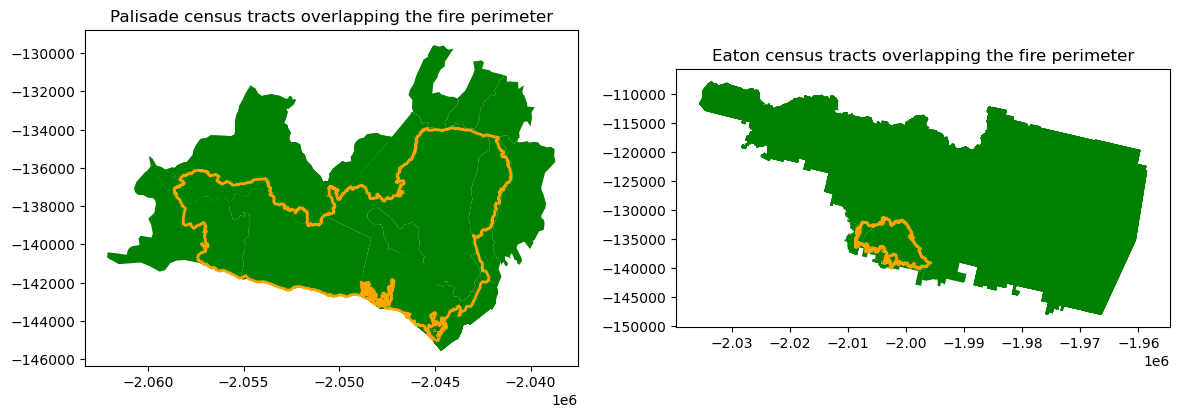

In [ ]:
# Plot of census tracts that intersect fire perimeter and highlighted fire perimeter.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

palisade_eji.plot(ax=ax1, 
                  color= 'green')
palisade.plot(ax=ax1, 
              edgecolor= 'orange', 
              color = 'none', 
              linewidth=2)

ax1.set_title('Palisades census tracts overlapping the fire perimeter')

eaton_eji.plot(ax=ax2, color= 'green')
eaton.plot(ax=ax2, 
              edgecolor= 'orange', 
              color = 'none', 
              linewidth=2)

ax2.set_title('Eaton census tracts overlapping the fire perimeter')

plt.show()


## 3. Polygon clipping

Clip the census tracts to the fire perimeters using `gpd.clip()`. This will return a polygon with only the census tracts within the fire perimeters.

In [19]:
# Use `gpd.clip()` to clip the eji intersections to the fire perimeters.
palisade_eji_clip = gpd.clip(palisade_eji, palisade)
eaton_eji_clip = gpd.clip(eaton_eji, eaton)

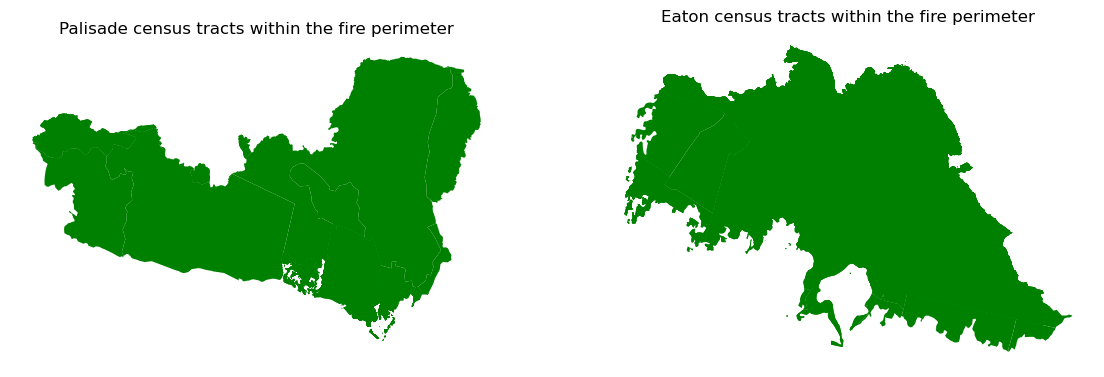

In [ ]:
# Plot of census tracts within the fire perimeter.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

palisade_eji_clip.plot(ax=ax1, 
                       color= 'green')
ax1.axis('off')

ax1.set_title('Palisades census tracts within the fire perimeter')

eaton_eji_clip.plot(ax=ax2, 
                    color= 'green')
ax2.axis('off')


ax2.set_title('Eaton census tracts within the fire perimeter')

plt.show()

# 4. Visualize fire perimeters with a basemap

By adding a basemap to our plot we will be using the contextily library.

Use `contextily` library to add a basemap to the plot, to help us spatially understand where the fires occured.

In [ ]:
# Match the CRS of the datasets.
palisade_eji_clip = palisade_eji_clip.to_crs('EPSG:3857')
eaton_eji_clip = eaton_eji_clip.to_crs('EPSG:3857')


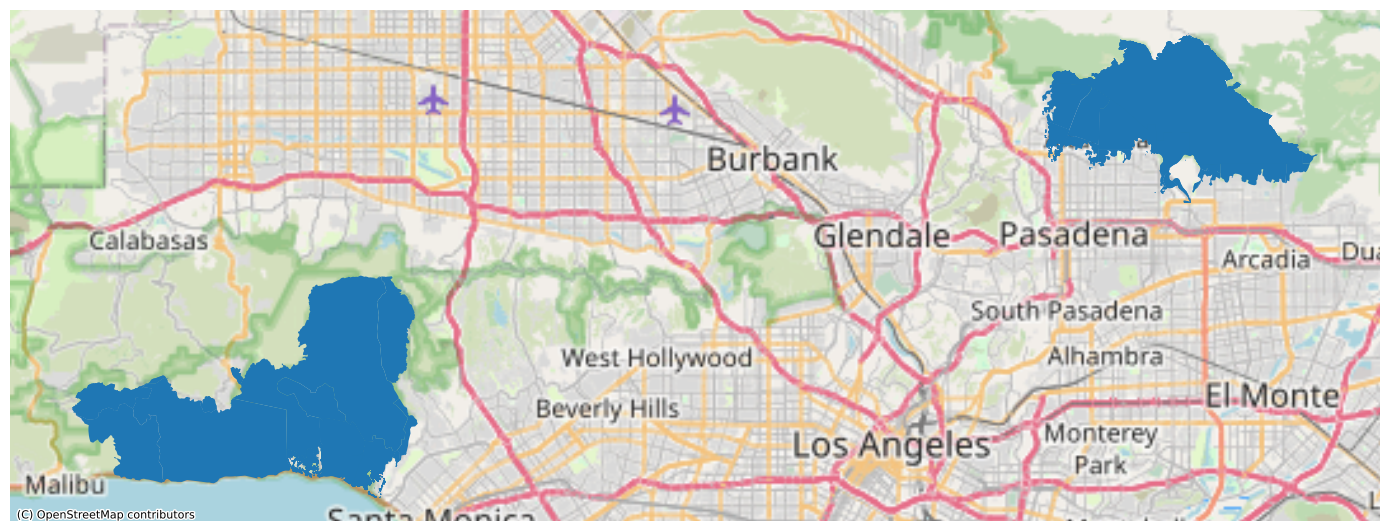

In [ ]:
# Create a plot of census tracts within the fire perimeter, with a basemap.
fig, ax = plt.subplots(1, 1, figsize=(14, 12))


palisade_eji_clip.plot(ax=ax)

eaton_eji_clip.plot(ax=ax)

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik,
                crs=palisade_eji_clip.crs)


# ADD LEGEND OR ANNOTATION TO IDENTIFY EACH FIRE

# ADD TITLE

ax.axis('off')

plt.tight_layout()
plt.show()

## 5. Visualize EJI data

Using `E_POV200`, which represents the Percentage of persons with income below 200% of the federal poverty level. We'll create a choropleth map to visualize the distribution of percentage of persons with income below 200% of the federal poverty level, within the fire perimeters.

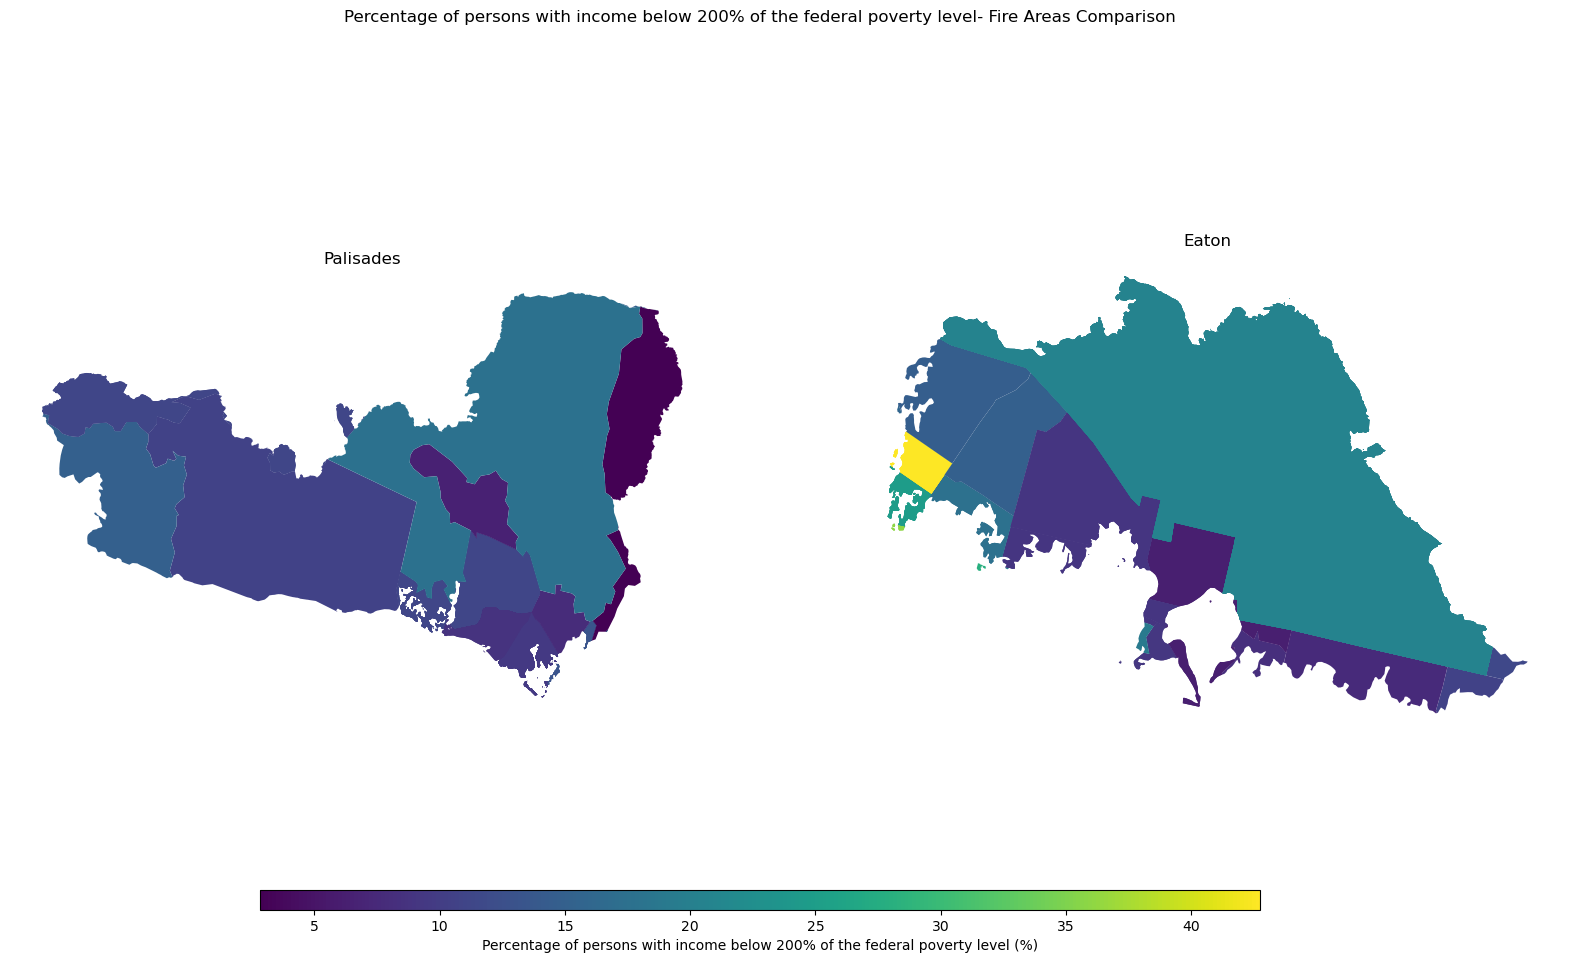

In [ ]:
# Create a choropleth map.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'E_POV200'

# Find common min/max for legend range
vmin = min(palisade_eji_clip[eji_variable].min(), palisade_eji_clip[eji_variable].min())
vmax = max(eaton_eji_clip[eji_variable].max(), eaton_eji_clip[eji_variable].max())

# Plot census tracts within Palisades perimeter
palisade_eji_clip.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('Palisades')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eaton_eji_clip.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Eaton')
ax2.axis('off')

# Add overall title
fig.suptitle('Percentage of persons with income below 200% of the federal poverty level- Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Percentage of persons with income below 200% of the federal poverty level (%)')

plt.show()

The choropleth map shows a mixed distribution of percentage of persons with income below 200% of the federal poverty level (%) within the Palisades fire perimeter. The map indicates that within the perimeter the range of percentage of persons with income below 200% of the federal poverty level is about <5% to 20%. The Eaton perimeter holds a larger range of percentages at <5% to 40%, with a large section of the census tracts within the fire perimeter appearing to be categorized as roughly 25% of persons with income below 200% of the federal poverty level. This could likely be due to the fact that this census tract sits on a less densely populated mountain side, where percentage estimates become more sensitive to outliers. 

These choropleth maps provide a tool for others to decide where relief and recovery resources should be prioritized. While fires can impact all residents, certain socioeconomic factors, such as a high percentage of persons with income below 200% of the federal poverty level can make relief and recovery from a fire more difficult. Understanding the spatial distribution of social vulnerabilities will help equitable response and recovery for future fires.